# **Fraud Detection with Supervised Learning**

## **Objective**
The primary objective of this project is to develop a fraud detection system using supervised learning techniques. The system will detect potentially fraudulent credit card transactions and serve as a foundational baseline model for future enhancements with advanced techniques like deep learning.

## **Problem Statement**
Credit card fraud is a significant issue faced by financial institutions worldwide. With the growing volume of transactions, detecting fraudulent activities in real-time is critical. Building an efficient fraud detection system can help minimise losses and protect customers from fraudulent charges. The challenge lies in identifying fraudulent transactions from vast amounts of data while maintaining low false positives and high detection rates.

## **Key Steps in the Project**

1. **Data Collection**: 
   - Load the dataset containing historical credit card transactions, ensuring it is correctly imported into the environment and prepared for analysis by addressing any file format or loading issues.

2. **Data Exploration and Preprocessing**: 
   - Perform detailed exploratory data analysis (EDA) to investigate the distributions of various features, detect potential outliers, handle missing values and gain insights into patterns or relationships between variables relevant to fraud detection, while also addressing the class imbalance in fraudulent and non-fraudulent transactions.

3. **Feature Engineering and Selection**: 
   - Identify and create relevant features that could enhance model performance, while also reducing dimensionality through feature selection techniques to eliminate irrelevant or redundant variables, improving both training efficiency and model accuracy.

4. **Model Selection and Training**: 
   - Select and apply appropriate supervised learning models such as **Random Forest** and **XGBoost** and train them on the preprocessed dataset, utilising cross-validation and hyperparameter tuning techniques to ensure robust model performance and avoid overfitting.

5. **Model Evaluation**: 
   - Use performance metrics like accuracy, precision, recall, F1-score and ROC-AUC to thoroughly evaluate model performance, with a special focus on handling false positives and false negatives, while also analysing confusion matrices to further refine detection strategies.

6. **Deployment**: 
   - Develop and deploy a web-based fraud detection system using **Flask**, integrating the trained model to detect fraudulent transactions in real-time and providing a user-friendly interface for inputting new transaction data and receiving predictions.

7. **Documentation**: 
   - Prepare comprehensive documentation detailing each phase of the project, including data preprocessing steps, feature engineering, model selection criteria, training methods, performance evaluation results and the deployment process to ensure reproducibility and clarity.


### **Step 1: Data Collection**

In [3]:
# -------------------------- Import Libraries --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, roc_curve, auc)
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Set up warnings filter and seaborn style
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [4]:
# -------------------------- Load Dataset --------------------------

# Load the dataset from a file
file_path = r"C:\Users\USER\Downloads\Fraud-Detection-with-Supervised-Learning\creditcard.csv"

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully. Here's a preview:")
    print(df.head())
except FileNotFoundError:
    print("Error: The file was not found at the specified location.")
except pd.errors.ParserError:
    print("Error: Could not parse the file. Check if the file is in the correct format.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully. Here's a preview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267

### **Step 2: Data Exploration and Preprocessing**

In [5]:
# -------------------------- Data Exploration and Preprocessing --------------------------

# ------------------- 1. Summary Statistics -------------------
# Get the basic information about the dataset
print("Dataset Info:")
df.info()

# Display summary statistics for numerical features
print("\nSummary Statistics:\n", df.describe())

# ------------------- 2. Missing Values -------------------
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Feature:\n", missing_values[missing_values > 0])

# ------------------- 3. Class Distribution -------------------
# Check for class imbalance
class_counts = df['Class'].value_counts()
print("\nClass Imbalance:\n", class_counts)

# Calculate the percentage of each class
non_fraud_percentage = (class_counts[0] / df.shape[0]) * 100
fraud_percentage = (class_counts[1] / df.shape[0]) * 100
print(f"\nProportion of Non-Fraudulent: {non_fraud_percentage:.2f}%")
print(f"Proportion of Fraudulent: {fraud_percentage:.2f}%")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

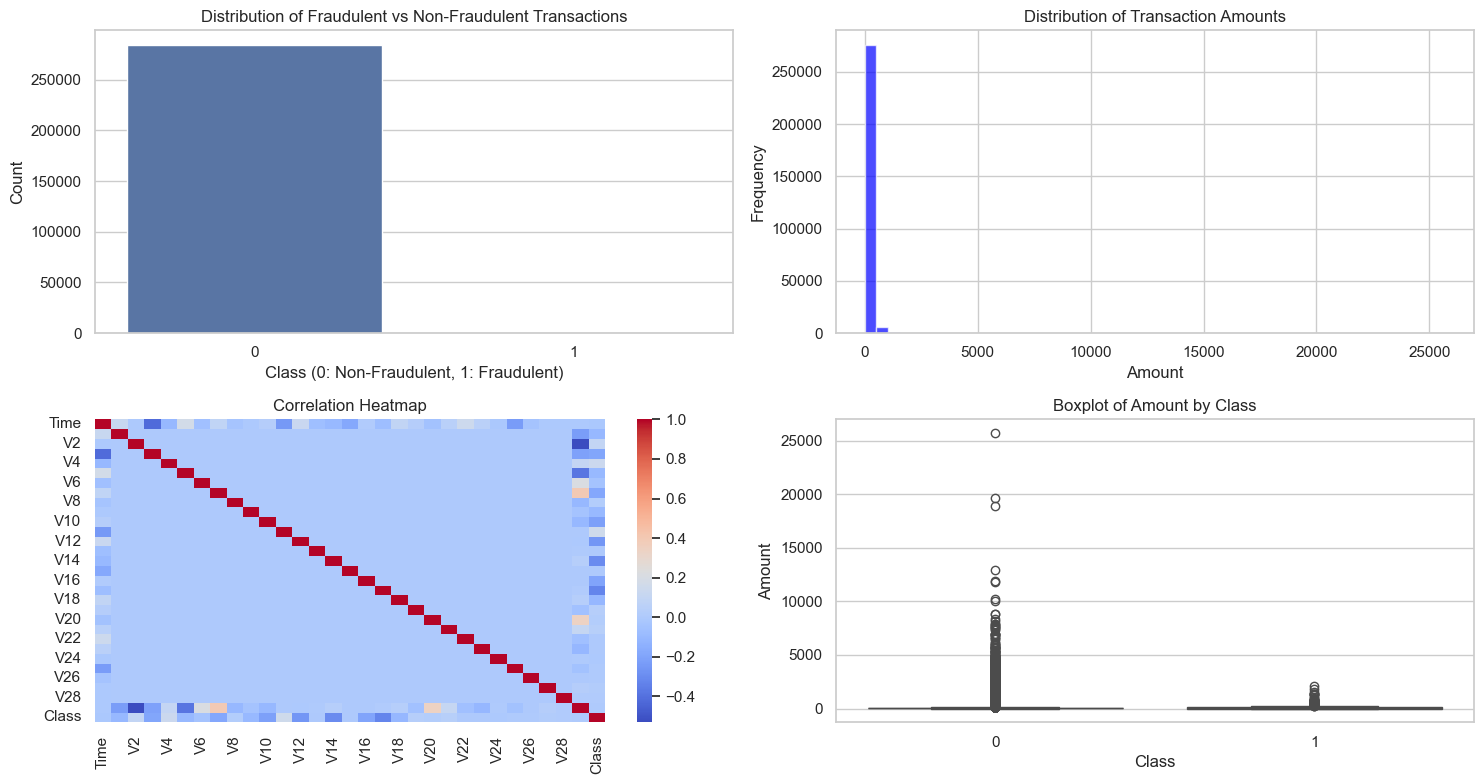

In [6]:
# ------------------- 4. Visualisations -------------------

# Set up the figure size for visualisations
plt.figure(figsize=(15, 8))

# ------------------- 1. Distribution of Class Labels -------------------
plt.subplot(2, 2, 1)
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')

# ------------------- 2. Distribution of Numerical Features -------------------
plt.subplot(2, 2, 2)
df['Amount'].hist(bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# ------------------- 3. Correlation Heatmap -------------------
plt.subplot(2, 2, 3)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')

# ------------------- 4. Boxplot to Detect Outliers -------------------
plt.subplot(2, 2, 4)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### **Step 3: Feature Engineering and Selection**

In [7]:
# Assuming df is the loaded DataFrame

# ------------------- 1. Feature Engineering -------------------

# Remove low-variance features (threshold can be tuned)
variance_threshold = 0.01  # Define a low variance threshold
selector = VarianceThreshold(threshold=variance_threshold)
X = df.drop(['Class'], axis=1)  # Features without the target
y = df['Class']  # Target variable

# Apply VarianceThreshold to remove low-variance features
X_high_variance = selector.fit_transform(X)
print(f"Features after VarianceThreshold: {X_high_variance.shape[1]}")

# Get the feature names after removing low-variance features
selected_features_variance = X.columns[selector.get_support(indices=True)]

# ------------------- 2. Feature Scaling -------------------

# Scale features to 0 to 1 for compatibility with chi-squared test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_high_variance)

# ------------------- 3. Feature Selection using Chi-Squared -------------------

# Select top k features using chi-squared test
k = 10  # Choose the number of top features to keep
selector_k_best = SelectKBest(score_func=chi2, k=k)

# Apply SelectKBest to choose the best features
X_k_best = selector_k_best.fit_transform(X_scaled, y)

# Get the indices of the selected features
selected_features_indices = selector_k_best.get_support(indices=True)

# Map the selected indices to the original feature names
final_selected_feature_names = selected_features_variance[selected_features_indices]
print("\nSelected Features:\n", final_selected_feature_names)

# ------------------- 4. Final Feature Set -------------------

# Create the final feature set based on the selected features
X_final = df[final_selected_feature_names]
print(f"\nFinal feature set shape: {X_final.shape}")


Features after VarianceThreshold: 30

Selected Features:
 Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')

Final feature set shape: (284807, 10)


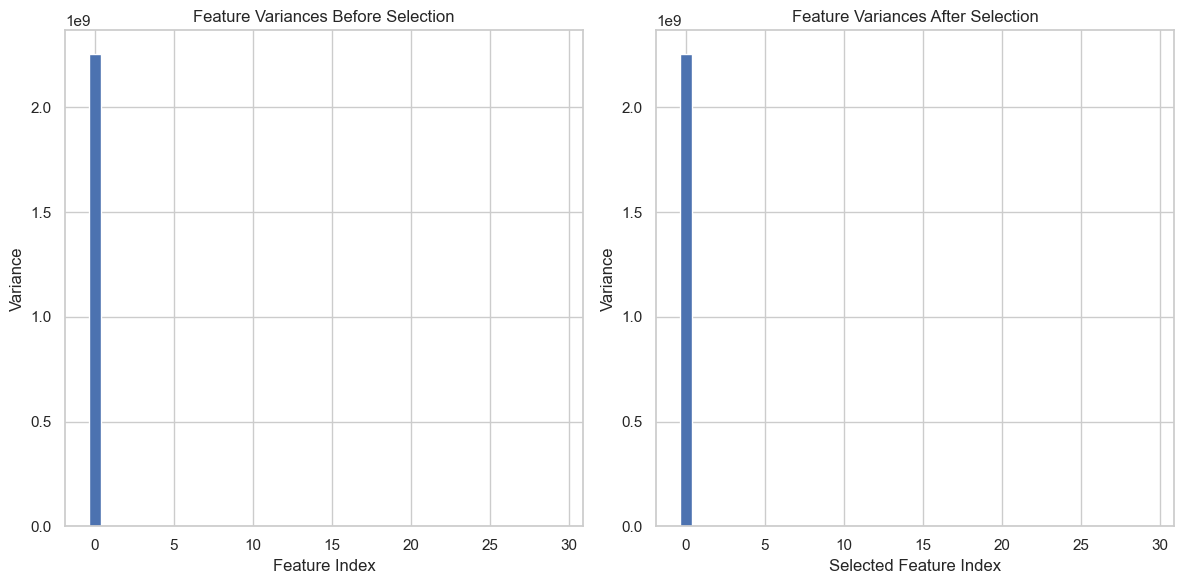


Selected Features:
 Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')


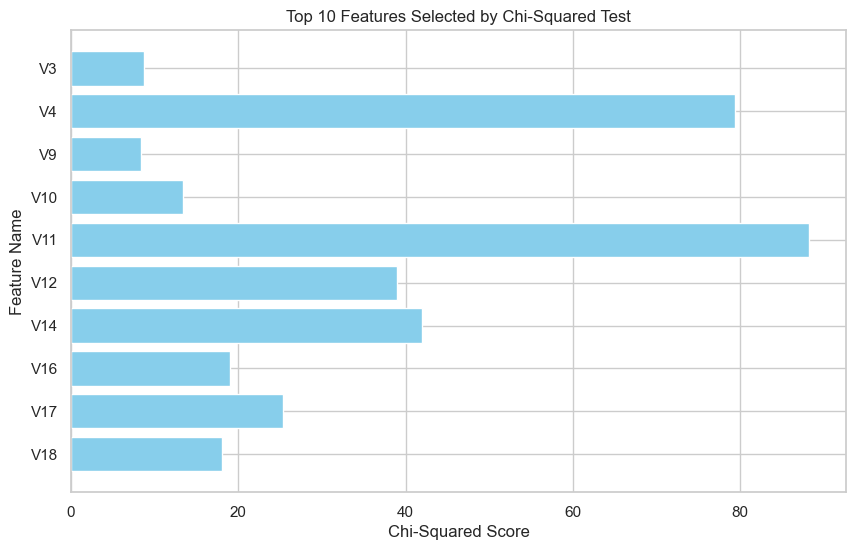

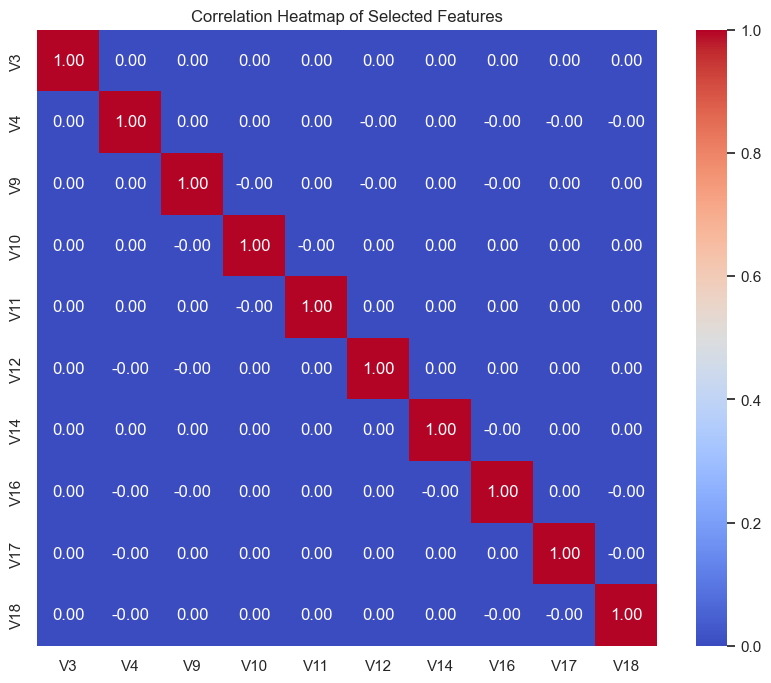

In [8]:
# ------------------- 3. Feature Engineering and Selection -------------------

# Define features (X) and target (y)
X = df.drop(['Class'], axis=1)  # Feature set
y = df['Class']  # Target variable

# 1. Variance Threshold to Remove Low-Variance Features
variance_threshold = 0.01  # Threshold to remove features with variance below 0.01
selector = VarianceThreshold(threshold=variance_threshold)
X_high_variance = selector.fit_transform(X)

# Get the original feature variances before selection
variances = X.var()

# Get the variances of the selected features after variance threshold
selected_variances = variances[selector.get_support(indices=True)]

# Visualise the variance of features before and after selection
plt.figure(figsize=(12, 6))

# Before VarianceThreshold
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(variances)), variances)
plt.title('Feature Variances Before Selection')
plt.xlabel('Feature Index')
plt.ylabel('Variance')

# After VarianceThreshold
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(selected_variances)), selected_variances)
plt.title('Feature Variances After Selection')
plt.xlabel('Selected Feature Index')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()

# Get the feature names after applying VarianceThreshold
features_after_variance_threshold = X.columns[selector.get_support(indices=True)]

# 2. Scaling for Chi-Squared Test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_high_variance)  # Scale the high-variance features to 0-1 range

# 3. SelectKBest to Select Top K Features
k = 10  # Number of top features to select
selector_k_best = SelectKBest(score_func=chi2, k=k)
X_k_best = selector_k_best.fit_transform(X_scaled, y)

# Get the selected feature indices and names after SelectKBest
selected_features_indices = selector_k_best.get_support(indices=True)
final_selected_feature_names = features_after_variance_threshold[selected_features_indices]

# Print selected features
print("\nSelected Features:\n", final_selected_feature_names)

# Visualise the chi-squared scores for the top k features
chi2_scores = selector_k_best.scores_
plt.figure(figsize=(10, 6))
plt.barh(final_selected_feature_names, chi2_scores[selected_features_indices], color='skyblue')
plt.title(f'Top {k} Features Selected by Chi-Squared Test')
plt.xlabel('Chi-Squared Score')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis()  # Display highest score at the top
plt.show()

# 4. Correlation Heatmap of Selected Features
# Create a DataFrame with the selected features
selected_df = df[final_selected_feature_names]

# Plot correlation heatmap of selected features
plt.figure(figsize=(10, 8))
correlation_matrix_selected = selected_df.corr()
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

### **Step 4: Model Selection and Training**

In [ ]:
# ------------------- 4. Model Selection and Training -------------------

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

# 1. ------------------- Random Forest Classifier -------------------
print("Training Random Forest Classifier...")

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV to tune hyperparameters with cross-validation
rf_grid_search = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

# Train the model
rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate Random Forest on the test set
rf_pred = best_rf_model.predict(X_test)

print("\nRandom Forest Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_pred))

# 2. ------------------- XGBoost Classifier -------------------
print("\nTraining XGBoost Classifier...")

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV to tune hyperparameters with cross-validation
xgb_grid_search = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)

# Train the model
xgb_grid_search.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate XGBoost on the test set
xgb_pred = best_xgb_model.predict(X_test)

print("\nXGBoost Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_pred))

# 3. ------------------- Cross-Validation Scores -------------------
# Perform 5-fold cross-validation for both models to assess performance
print("\nCross-Validation Scores:")

# Random Forest cross-validation scores
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Random Forest Cross-Validation AUC: {np.mean(rf_cv_scores):.4f} ± {np.std(rf_cv_scores):.4f}")

# XGBoost cross-validation scores
xgb_cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"XGBoost Cross-Validation AUC: {np.mean(xgb_cv_scores):.4f} ± {np.std(xgb_cv_scores):.4f}")


Training Random Forest Classifier...
